In [45]:
#Import Library Yang Dibutuhkan 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  

#Import Data
df = pd.read_csv('datasetSiswa.csv') 

#Lihat sample data dan Info data 
print('Sample 5 data teratas :\n',df.head())
print(20*'**')
print('Info data :\n',df.info())
print(20*'**','\n\n')

Sample 5 data teratas :
                                 Nama JK KOMLI  AGAMA  PPKn  BINDO  MAT  \
0              Agustinus Hendro Ambe  L  ATPH     78    82     81   79   
1                    Argoverni Sadam  L  ATPH     82    81     80   80   
2                    ARIYUDUS JEHABA  L  ATPH     82    81     80   80   
3  AVENSIANUS FORBIN YONSAN TANGGUNG  L  ATPH     83    83     82   80   
4                 BENEDIKTA KETRIANI  P  ATPH     84    83     82   82   

   SEJINDO  BING  MULOK  SENBUD  PJOK  SIMDIK  FISIKA  BIOLOGI  KIMIA  DPK  \
0       80    79     83      78    77      80      77     80.0     76   82   
1       80    79     83      77    76      84      78     79.0     75   83   
2       80    80     83      78    77      84      78     79.0     75   83   
3       80    83     83      79    78      84      78     79.0     84   82   
4       80    88     83      78    77      84      80     80.0     78   83   

   KK  UKK  
0  82   85  
1  82   85  
2  81   84  
3  84   8

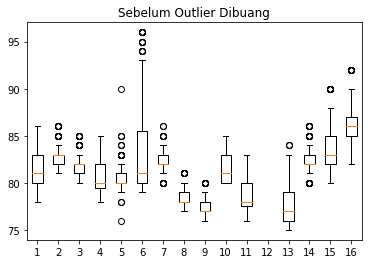

Jumlah Baris Sebelum Outlier dibuang: 219
****************************************


In [46]:
kolom_numerik = ['AGAMA','PPKn','BINDO','MAT','SEJINDO','BING','MULOK','SENBUD','PJOK','SIMDIK','FISIKA','BIOLOGI','KIMIA','DPK','KK','UKK'] 
plt.boxplot(df[kolom_numerik])
plt.title('Sebelum Outlier Dibuang')
plt.show()  

# Data Sebelum dibuang outliernya 
print(f'Jumlah Baris Sebelum Outlier dibuang: {df.shape[0]}') 
print(20*'**')

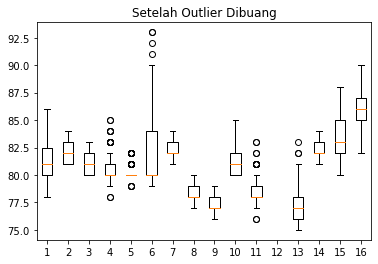

Jumlah Baris setelah outlier dibuang: 131


In [47]:
# Q1, Q3, dan IQR
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]

#Cek outlier setelah dibuang
plt.boxplot(df[kolom_numerik])
plt.title('Setelah Outlier Dibuang')
plt.show() 
print(f'Jumlah Baris setelah outlier dibuang: {df.shape[0]}') 

In [48]:
# Membuat Kolom baru bernama 'final score' 
df['final score'] = df[['AGAMA','PPKn','BINDO','MAT','SEJINDO','BING','MULOK','SENBUD','PJOK','SIMDIK','FISIKA','BIOLOGI','KIMIA','DPK','KK','UKK']].mean(axis=1)
print('Data Setelah ditambah kolom baru',df.head())
 
#Save data yang sudah bersih 
df.to_csv('peforma_cleaned.csv', index=False)

Data Setelah ditambah kolom baru                     Nama JK KOMLI  AGAMA  PPKn  BINDO  MAT  SEJINDO  BING  \
0  Agustinus Hendro Ambe  L  ATPH     78    82     81   79       80    79   
1        Argoverni Sadam  L  ATPH     82    81     80   80       80    79   
2        ARIYUDUS JEHABA  L  ATPH     82    81     80   80       80    80   
4     BENEDIKTA KETRIANI  P  ATPH     84    83     82   82       80    88   
5    Eduardus Samsu Titi  L  ATPH     84    81     80   80       80    79   

   MULOK  SENBUD  PJOK  SIMDIK  FISIKA  BIOLOGI  KIMIA  DPK  KK  UKK  \
0     83      78    77      80      77     80.0     76   82  82   85   
1     83      77    76      84      78     79.0     75   83  82   85   
2     83      78    77      84      78     79.0     75   83  81   84   
4     83      78    77      84      80     80.0     78   83  83   86   
5     82      78    77      80      78     79.0     75   83  83   86   

   final score  
0      79.9375  
1      80.2500  
2      80.3125  
4  

In [63]:
#VISUALISASI DATA
# Import dan lihat sample data 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('./peforma_cleaned.csv') 
print(df.head()) 
print(20*'**')

   AGAMA  PPKn  BINDO  MAT  SEJINDO  BING  MULOK  SENBUD  PJOK  SIMDIK  \
0     78    82     81   79       80    79     83      78    77      80   
1     82    81     80   80       80    79     83      77    76      84   
2     82    81     80   80       80    80     83      78    77      84   
3     84    83     82   82       80    88     83      78    77      84   
4     84    81     80   80       80    79     82      78    77      80   

   FISIKA  KIMIA  DPK  KK  UKK  final score  
0      77     76   82  82   85      79.9375  
1      78     75   83  82   85      80.2500  
2      78     75   83  81   84      80.3125  
3      80     78   83  83   86      81.9375  
4      78     75   83  83   86      80.3125  
****************************************


In [ ]:
plt.figure(1)
colors = sns.color_palette("Set2")
#first row, first column
ax1 = plt.subplot2grid((1,1),(0,0))
plt.pie(df.groupby('JK').size(), labels =df['JK'].unique(), autopct='%.0f%%', colors=colors)
plt.title('Jenis Kelamin', color='blue')


In [ ]:

plt.figure(2)

colors = sns.color_palette("Set2")
#first row sec column 
ax1 =  plt.subplot2grid((1,1), (0,0), rowspan=6)
plt.pie(df.groupby('KOMLI').size(), labels =df['KOMLI'].unique(), autopct='%.0f%%', colors=colors)
plt.title('KOMLI', color='blue')


In [ ]:
#Histogram Nilai
plt.figure(5)
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 6))
fig.suptitle('Grafik Distribusi Nilai Siswa')
sns.histplot(df['AGAMA'], color='blue', ax=ax[0], alpha=0.5, bins=25) 
sns.histplot(df['PPKn'], color='orange', ax=ax[1], alpha=0.5, bins=25) 
sns.histplot(df['BINDO'], color='green', ax=ax[2], alpha=0.5, bins=25) 
sns.histplot(df['MAT'], color='blue', ax=ax[3], alpha=0.5, bins=25) 
sns.histplot(df['BING'], color='orange', ax=ax[4], alpha=0.5, bins=25) 
sns.histplot(df['SEJINDO'], color='green', ax=ax[5], alpha=0.5, bins=25) 
plt.show()

plt.figure(6)
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 6))
sns.histplot(df['MULOK'], color='blue', ax=ax[0], alpha=0.5, bins=25) 
sns.histplot(df['SENBUD'], color='orange', ax=ax[1], alpha=0.5, bins=25) 
sns.histplot(df['PJOK'], color='green', ax=ax[2], alpha=0.5, bins=25) 
sns.histplot(df['SIMDIK'], color='blue', ax=ax[3], alpha=0.5, bins=25) 
sns.histplot(df['BIOLOGI'], color='orange', ax=ax[4], alpha=0.5, bins=25) 
sns.histplot(df['FISIKA'], color='green', ax=ax[5], alpha=0.5, bins=25) 
plt.show()

plt.figure(7)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
sns.histplot(df['KIMIA'], color='blue', ax=ax[0], alpha=0.5, bins=25) 
sns.histplot(df['DPK'], color='orange', ax=ax[1], alpha=0.5, bins=25) 
sns.histplot(df['KK'], color='green', ax=ax[2], alpha=0.5, bins=25) 
sns.histplot(df['UKK'], color='blue', ax=ax[3], alpha=0.5, bins=25) 
plt.show()

In [ ]:
# Membuat Scatter Plot untuk masing masing score (mapel)
import plotly.express as px
fig3 = px.scatter_3d(df, x='DPK', y='KK', z='UKK', color='KOMLI', opacity=0.7)
fig3.show()

In [54]:
from sklearn.cluster import KMeans

#Standarisasi 
from sklearn.preprocessing import StandardScaler  
kolom_numerik = ['AGAMA','PPKn','BINDO','MAT','SEJINDO','BING','MULOK','SENBUD','PJOK','SIMDIK','FISIKA','BIOLOGI','KIMIA','DPK','KK','UKK']
for kolom in kolom_numerik: 
    df[kolom]= StandardScaler().fit_transform(df[[kolom]])  

# Label Encoding 
from sklearn.preprocessing import LabelEncoder
kolom_kategorikal = ['JK','KOMLI']
for kolom in kolom_kategorikal: 
    LE = LabelEncoder() 
    df[kolom] = LE.fit_transform(df[kolom])
    print(LE.classes_)
    print(np.sort(df[kolom].unique()))
    print(20*'--') 

['L' 'P']
[0 1]
----------------------------------------
['APAT' 'ATPH' 'ATR' 'RPL']
[0 1 2 3]
----------------------------------------


In [170]:
Sum_of_squared_distances = []
K = range(4,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_) 
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.title('Jumlah Cluster Optimal')
plt.show()

ValueError: could not convert string to float: 'Agustinus Hendro Ambe'

In [66]:
#Import Library Yang Dibutuhkan 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  

#Import Data
df = pd.read_csv('datasetSiswa.csv') 

In [158]:
# Membuat Kolom baru bernama 'final score' 
df['final score'] = df[['AGAMA','PPKn','BINDO','MAT','SEJINDO','BING','MULOK','SENBUD','PJOK','SIMDIK','FISIKA','BIOLOGI','KIMIA','DPK','KK','UKK']].mean(axis=1)
print('Data Setelah ditambah kolom baru',df.head())
 
#Save data yang sudah bersih 
df.to_csv('peforma_cleaned.csv', index=False)

Data Setelah ditambah kolom baru                                 Nama JK KOMLI  AGAMA  PPKn  BINDO  MAT  \
0              Agustinus Hendro Ambe  L  ATPH     78    82     81   79   
1                    Argoverni Sadam  L  ATPH     82    81     80   80   
2                    ARIYUDUS JEHABA  L  ATPH     82    81     80   80   
3  AVENSIANUS FORBIN YONSAN TANGGUNG  L  ATPH     83    83     82   80   
4                 BENEDIKTA KETRIANI  P  ATPH     84    83     82   82   

   SEJINDO  BING  MULOK  ...  SIMDIK  FISIKA  BIOLOGI  KIMIA  DPK  KK  UKK  \
0       80    79     83  ...      80      77     80.0     76   82  82   85   
1       80    79     83  ...      84      78     79.0     75   83  82   85   
2       80    80     83  ...      84      78     79.0     75   83  81   84   
3       80    83     83  ...      84      78     79.0     84   82  84   87   
4       80    88     83  ...      84      80     80.0     78   83  83   86   

   final score  cluster  cluster description  
0     

In [169]:
#Kolom Features
X = df[['JK','KOMLI','AGAMA','PPKn',
'BINDO','MAT','SEJINDO','BING','MULOK',
'SENBUD','PJOK','SIMDIK','FISIKA','KIMIA','DPK','KK','UKK']]  

#Training Model
cluster_model = KMeans(n_clusters = 3, random_state = 24)  
labels = cluster_model.fit_predict(X)  

# Membuat Kolom baru bernama 'cluster',
df_final = df 
df_final['cluster'] = labels
print(df_final['cluster'].head())

ValueError: could not convert string to float: 'L'

In [132]:
# Membuat Kolom keterangan cluster
cluster_description = ({0 : 'Baik', 
                        1 : 'Cukup',
                        2 : 'Kurang'})

df_final['cluster description'] = df_final['cluster'].map(cluster_description)
print(df_final[['cluster','cluster description']].head())

   cluster cluster description
0        1               Cukup
1        1               Cukup
2        1               Cukup
3        2              Kurang
4        0                Baik


In [134]:
#Menyimpan Model
import pickle
pickle.dump(cluster_model, open('cluster.pkl', 'wb'))  

In [166]:
#Membuat data baru
#'AGAMA','PPKn','BINDO','MAT','SEJINDO','BING','MULOK','SENBUD',
# 'PJOK','SIMDIK','FISIKA','KIMIA','DPK','KK','UKK'
new_df = pd.DataFrame({
           'JK':'L',
           'KOMLI':'ATPH',
           'AGAMA' : [50], 
           'PPKn' : [50], 
           'BINDO' : [50], 
           'MAT' : [50],
           'SEJINDO' : [50], 
           'BING' : [50],
           'MULOK': [50], 
           'SENBUD': [20], 
           'PJOK': [40], 
           'SIMDIK' : [40], 
           'FISIKA': [40],
           'KIMIA': [20], 
           'DPK': [40],  
           'KK' : [40], 
           'UKK' : [80]}) 

#Membuat Fungsi preprocessing
def Preprocess(new_data): 

    # Membuat Kolom rata-rata (final score)
    #new_data['final score'] = new_data[['AGAMA','PPKn','BINDO','MAT','SEJINDO','BING','MULOK','SENBUD','PJOK','SIMDIK','FISIKA','KIMIA','DPK','KK','UKK']].mean(axis=1)

    # Normalisasi 
    new_data['AGAMA'] = (new_data['AGAMA'] ) / (df['AGAMA'].max())
    new_data['PPKn']  = (new_data['PPKn']) / (df['PPKn'].max())
    new_data['BINDO'] = (new_data['BINDO']) / (df['BINDO'].max())
    new_data['MAT'] = (new_data['MAT'] ) / (df['MAT'].max())
    new_data['SEJINDO']  = (new_data['SEJINDO']) / (df['SEJINDO'].max())
    new_data['BING'] = (new_data['BING']) / (df['BING'].max())
    new_data['MULOK'] = (new_data['MULOK'] ) / (df['MULOK'].max())
    new_data['SENBUD']  = (new_data['SENBUD']) / (df['SENBUD'].max())
    new_data['PJOK'] = (new_data['PJOK']) / (df['PJOK'].max())
    new_data['SIMDIK'] = (new_data['SIMDIK'] ) / (df['SIMDIK'].max())
    new_data['FISIKA']  = (new_data['FISIKA']) / (df['FISIKA'].max())
    new_data['KIMIA'] = (new_data['KIMIA']) / (df['KIMIA'].max())
    new_data['DPK'] = (new_data['DPK'] ) / (df['DPK'].max())
    new_data['KK']  = (new_data['KK']) / (df['KK'].max())
    new_data['UKK'] = (new_data['UKK']) / (df['UKK'].max())

    # Encoding 
    gender_map = ({'P' : 0, 
                   'L' : 1})
    race_map = ({'ATPH' : 0, 
                 'APAT' : 1, 
                 'ATR' : 2, 
                 'RPL' : 3})

    
    kolom_kategorikal = ['JK','KOMLI']
    mapping_ = [gender_map, race_map]
    for kolom, my_map in zip(kolom_kategorikal, mapping_):
        new_data[kolom] = new_data[kolom].map(my_map)
    
    return new_data 

# Preprocessing new_df dengan fungsi yang sudah dibuat
new_df = Preprocess(new_df) 

print(new_df.head())

   JK  KOMLI     AGAMA      PPKn     BINDO       MAT   SEJINDO      BING  \
0   1      0  0.581395  0.581395  0.588235  0.588235  0.555556  0.520833   

      MULOK    SENBUD  PJOK    SIMDIK    FISIKA     KIMIA       DPK        KK  \
0  0.581395  0.246914   0.5  0.470588  0.481928  0.238095  0.465116  0.444444   

        UKK  
0  0.869565  


In [167]:
#Memanggil model yang sudah dibuat
kmeans_model = pickle.load(open('./cluster.pkl', 'rb')) 
print(kmeans_model)

KMeans(n_clusters=3, random_state=24)


In [168]:
#Lakuan prediksi 
cluster = kmeans_model.predict(new_df)

if cluster == 0: 
    print(f'Cluster {cluster}, Peforma Baik')
elif cluster == 1:
    print(f'Cluster {cluster}, Peforma Cukup') 
elif cluster == 2: 
    print(f'Cluster {cluster}, Peforma Kurang') 

ValueError: X has 17 features, but KMeans is expecting 15 features as input.